In [1]:
# Import packages
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv('train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
# Prepare data
df["churn"] = np.where(df["churn"].str.contains("yes"), 1, 0)
df["international_plan"] = np.where(df["international_plan"].str.contains("yes"), 1, 0)
df["voice_mail_plan"] = np.where(df["voice_mail_plan"].str.contains("yes"), 1, 0)

In [4]:
df = df.drop(columns = ["state"])
df = pd.get_dummies(df)

In [5]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,False,True,False
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,False,True,False
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,True,False,False
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,False,True,False
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,False,False,True


In [6]:
# Fit Cox’s Proportional Hazards model
cph = CoxPHFitter(penalizer = 0.1)
cph.fit(df, "account_length", event_col = "churn")

<lifelines.CoxPHFitter: fitted with 4250 total observations, 3652 right-censored observations>

In [7]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 4250 total observations, 3652 right-censored observations>
             duration col = 'account_length'
                event col = 'churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 4250
number of events observed = 598
   partial log-likelihood = -4183.60
         time fit was run = 2024-03-28 16:34:09 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
international_plan              0.95       2.58       0.09             0.78             1.11                 2.18                 3.04
voice_mail_plan                -0.32       0.73       0.09            -0.49            -0.14                 0.61                 0.87
number_vmail_messages          -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
total_day_minutes               0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
total_day_calls                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_day_charge                0.02       1.02       0.00             0.01             0.03                 1.01                 1.03
total_eve_minutes               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_eve_calls                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_eve_charge                0.02       1.02       0.01            -0.00             0.03                 1.00                 1.03
total_night_minutes             0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_night_calls              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_night_charge              0.02       1.02       0.02            -0.01             0.06                 0.99                 1.06
total_intl_minutes              0.02       1.02       0.01            -0.01             0.05                 0.99                 1.05
total_intl_calls               -0.02       0.98       0.01            -0.05             0.00                 0.95                 1.00
total_intl_charge               0.07       1.08       0.05            -0.03             0.18                 0.97                 1.19
number_customer_service_calls   0.20       1.22       0.02             0.16             0.24                 1.17                 1.27
area_code_area_code_408        -0.00       1.00       0.08            -0.16             0.16                 0.85                 1.17
area_code_area_code_415        -0.02       0.98       0.07            -0.16             0.13                 0.85                 1.13
area_code_area_code_510         0.03       1.03       0.08            -0.13             0.19                 0.88                 1.21

                                cmp to     z      p   -log2(p)
covariate                                                     
international_plan                0.00 11.13 <0.005      93.12
voice_mail_plan                   0.00 -3.59 <0.005      11.56
number_vmail_messages             0.00 -2.31   0.02       5.57
total_day_minutes                 0.00  4.96 <0.005      20.46
total_day_calls                   0.00  0.13   0.90       0.15
total_day_charge                  0.00  4.96 <0.005      20.46
total_eve_minutes                 0.00  1.83   0.07       3.90
total_eve_calls                   0.00  0.14   0.89       0.17
total_eve_charge                  0.00  1.83   0.07       3.90
total_night_minutes               0.

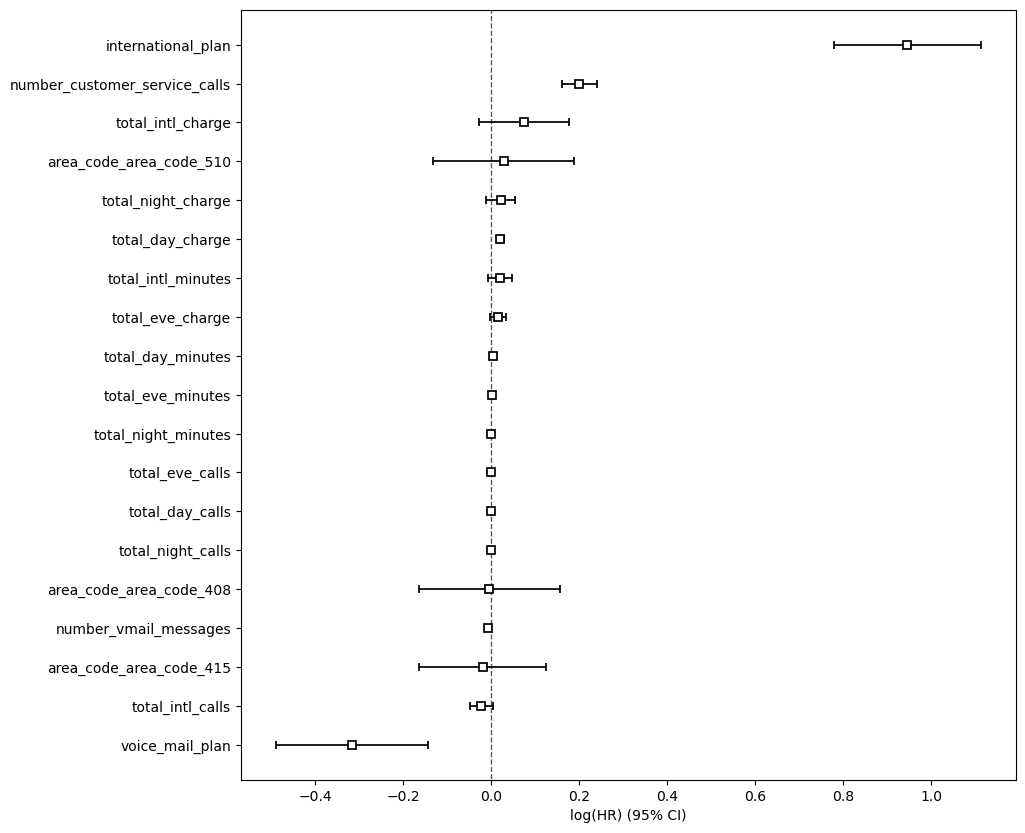

In [8]:
# Plot model's coefficients
plt.figure(figsize = (10,10))
cox = cph.plot()

**Observations:** We can see here that customers on the international plan are significantly more likely to churn. Obviously, there's also a link with the total international charges metric, so perhaps they're leaving because the prices are too high.

The next big issue is with the number of 'customer of service' calls placed. It seems important to identify what went wrong and caused these customers to call.

Finally, customers on the voice mail plan are least likely to churn, so there might be something the company can do here. Perhaps aiming to acquire voice mail customers, encouraging others to move to this plan, or examining why the customers here are less likely to churn than the rest would help.